In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )

In [14]:
import mlflow 
from mlflow.models import infer_signature

In [15]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, accuracy_score

## Data Preparation 
This includes cleaning the data, handling missing values, and feature engineering.


In [16]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [18]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [19]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [23]:
df.describe()
# see outlier in numerical categories 

,price,area,bedrooms,bathrooms,stories,parking
count,5.220000e+02,522.000000,522.000000,522.000000,522.000000,522.000000
mean,4.628689e+06,5002.262452,2.929119,1.245211,1.796935,0.660920
std,1.656354e+06,1920.157898,0.704220,0.430625,0.870144,0.841558
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3525.000000,2.000000,1.000000,1.000000,0.000000
50%,4.270000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000
75%,5.600000e+06,6288.500000,3.000000,1.000000,2.000000,1.000000
max,9.870000e+06,11460.000000,5.000000,2.000000,4.000000,3.000000


In [24]:
def remove_outliers(df):
   
    for column in df.select_dtypes('int64'):
        max_threshold = df[column].mean() + 3 * df[column].std()
        min_threshold = df[column].mean() - 3 * df[column].std()
        df = df[(df[column] >= min_threshold) & (df[column] <= max_threshold)]
    return df

df = remove_outliers(df)


In [25]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
13,9240000,3500,4,2,2,yes,no,no,yes,no,2,no,furnished
14,9240000,7800,3,2,2,yes,no,no,no,no,0,yes,semi-furnished
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [26]:
df['furnishingstatus']=df['furnishingstatus'].map({'furnished':3,'semi-furnished':2,'unfurnished':1})

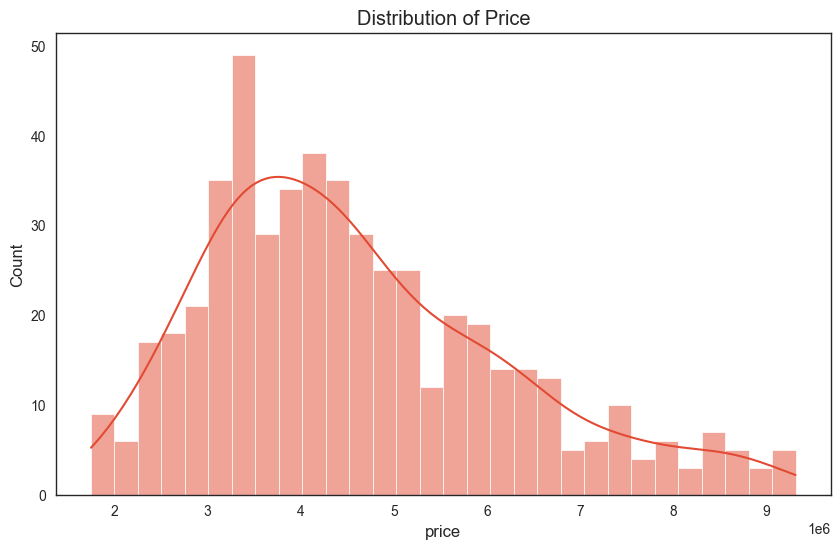

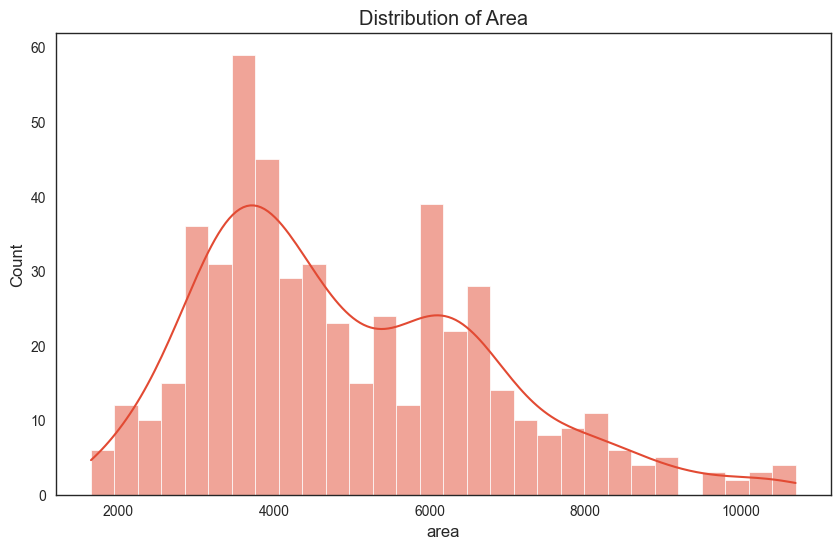

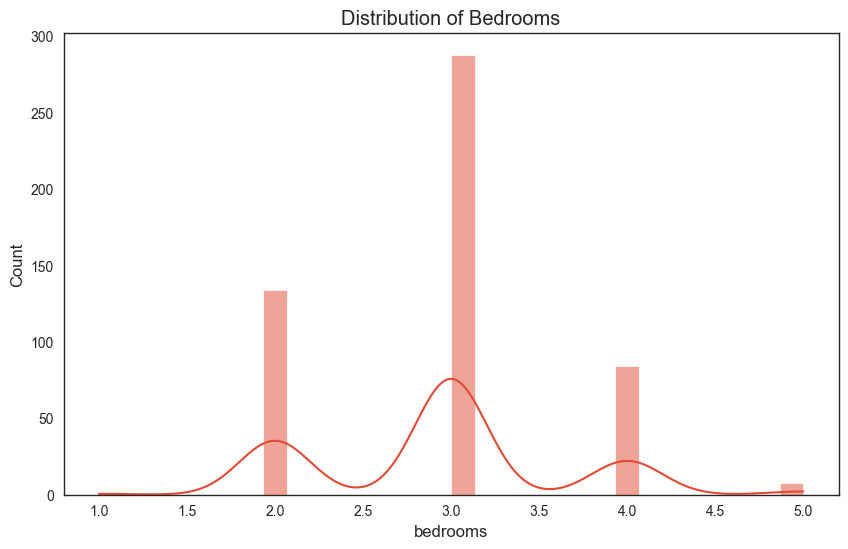

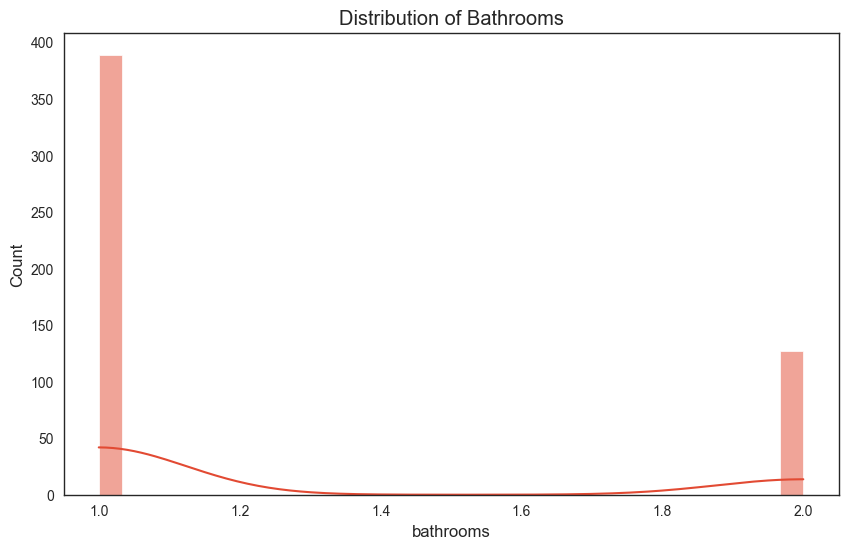

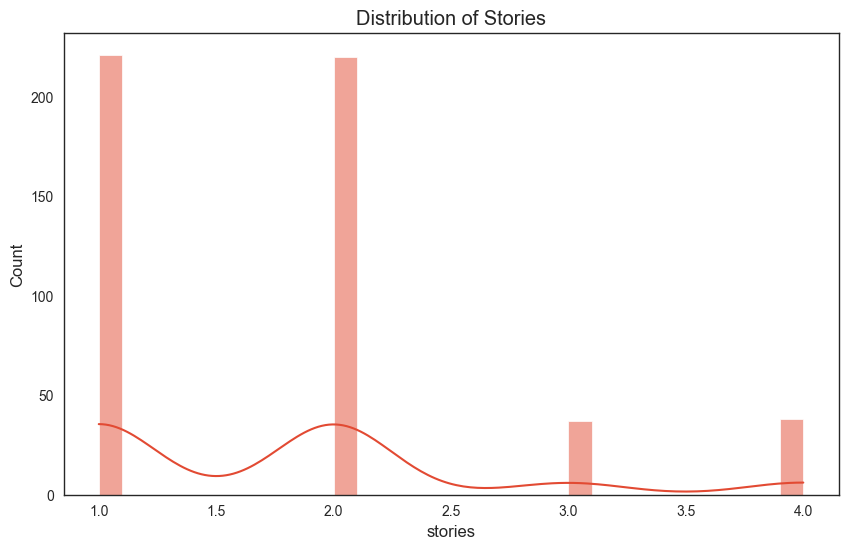

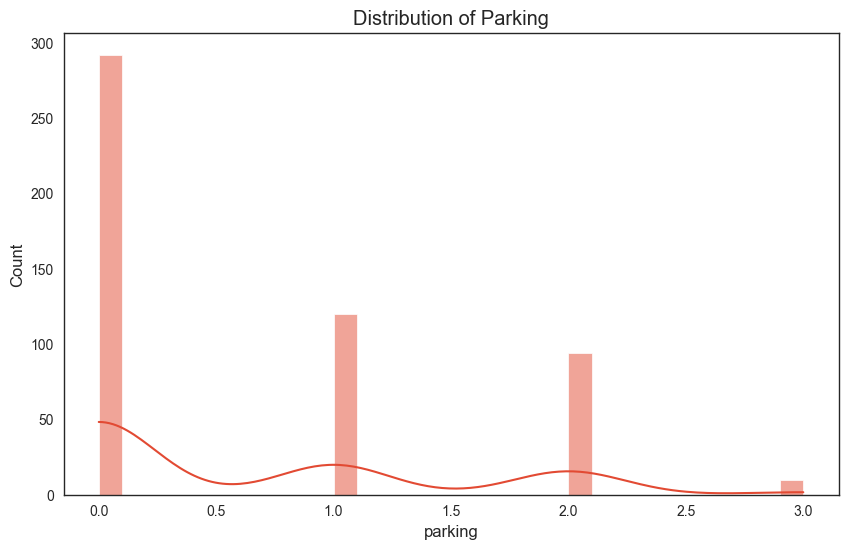

In [27]:
numerical_features=['price','area',	'bedrooms',	'bathrooms','stories','parking']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, bins=30)

    plt.title(f'Distribution of {feature.capitalize()}')
    plt.show()

In [28]:
# Process boolean values 
yes_no_mapping = {'yes': True, 'no': False}
columns_to_map = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for column in columns_to_map:
    df[column] = df[column].map(yes_no_mapping)

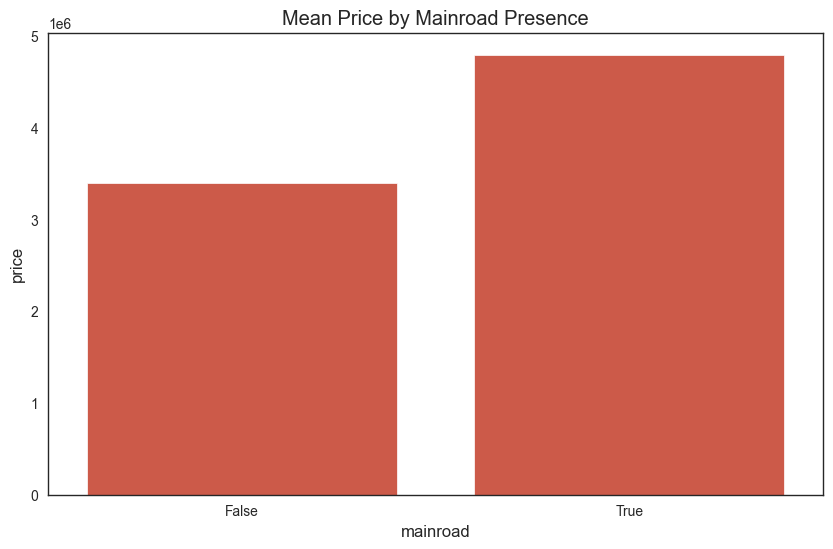

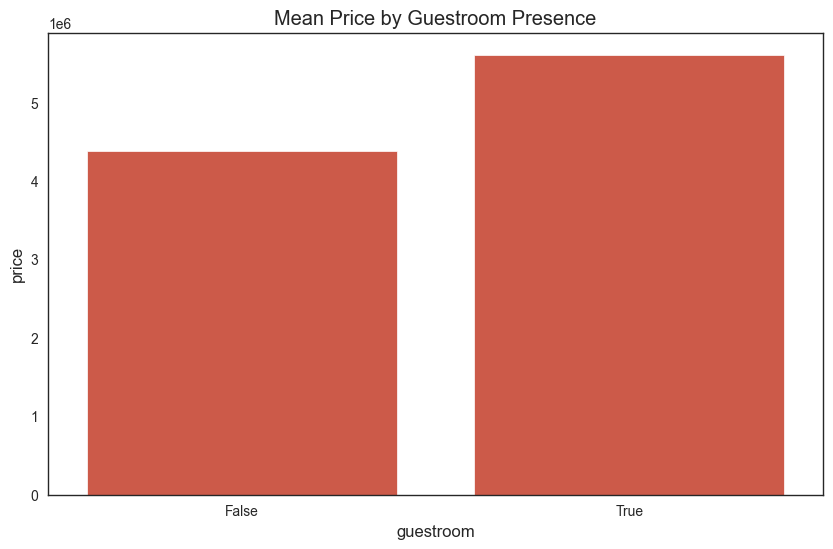

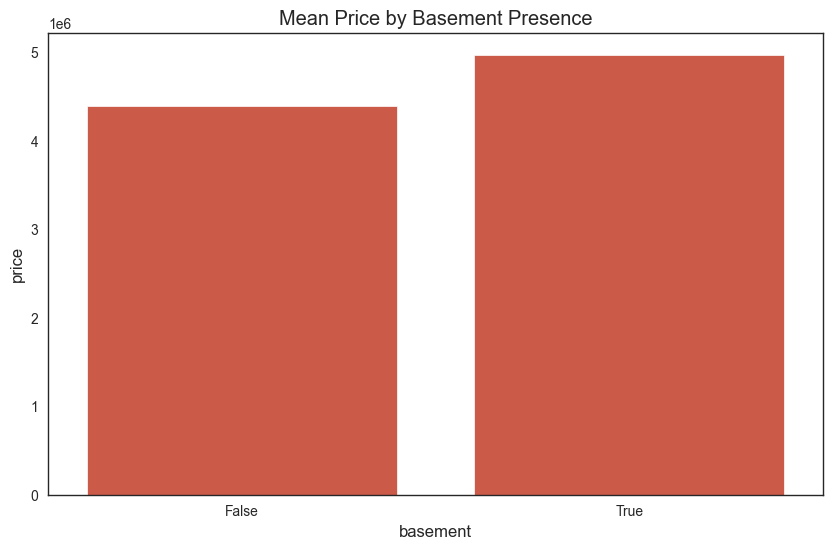

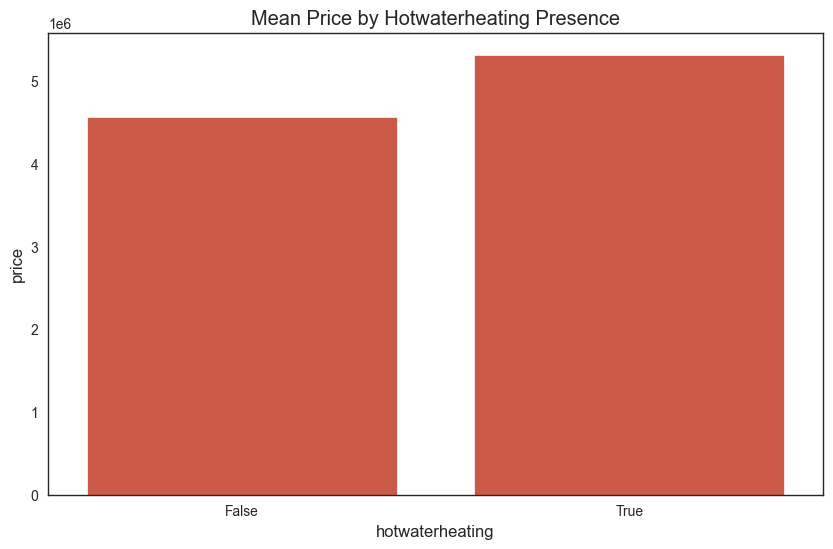

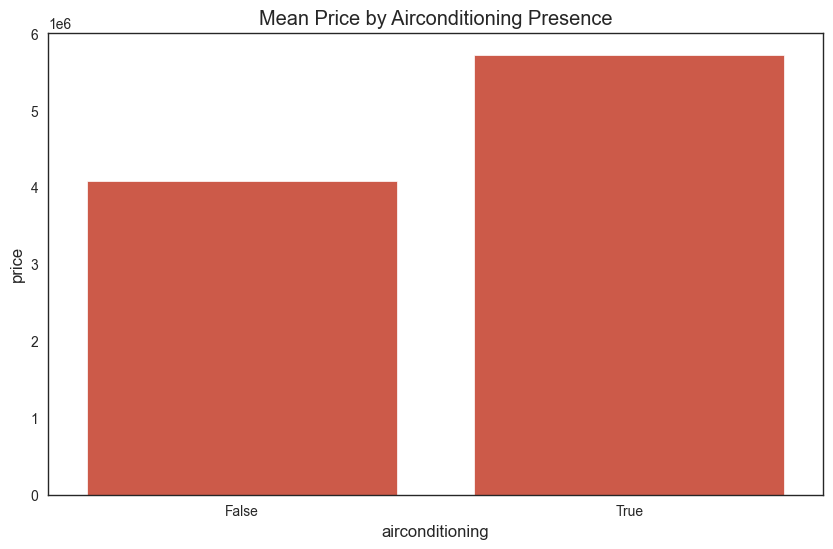

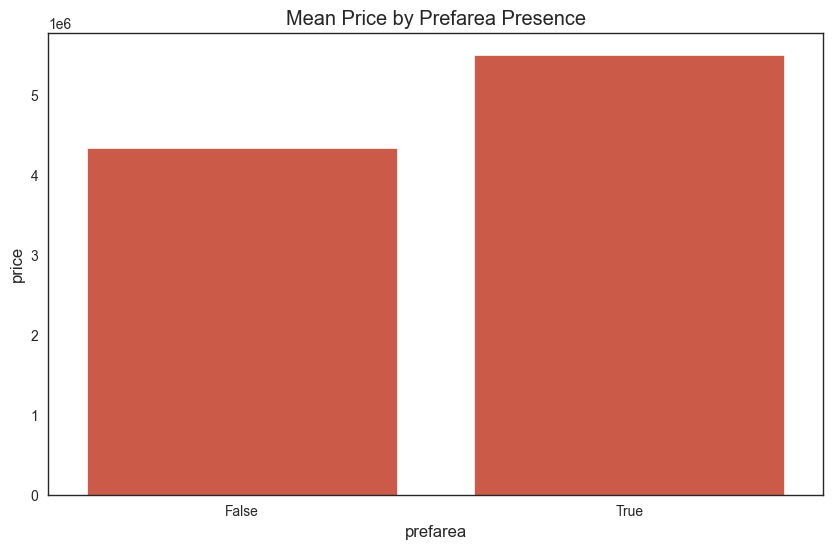

In [29]:

for feature in columns_to_map:
    mean_price_by_feature = df.groupby(feature)['price'].mean().reset_index()
  
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='price', data=mean_price_by_feature)
    plt.title(f'Mean Price by {feature.capitalize()} Presence')
    plt.show()


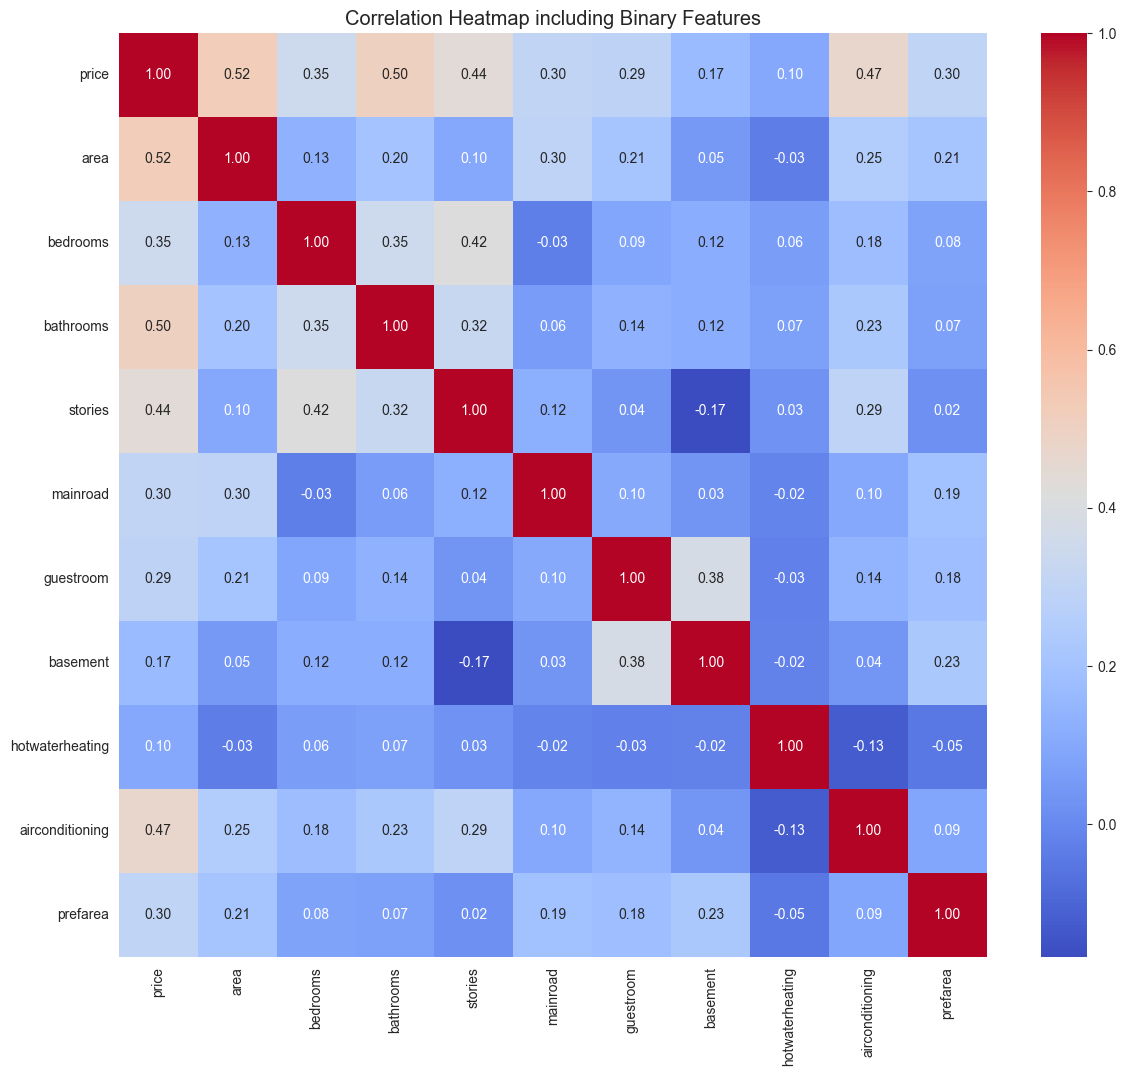

In [30]:
features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories'] + ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
corr_matrix = df[features].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})
plt.title('Correlation Heatmap including Binary Features')
plt.show()

In [16]:
## Don't see highly correlated columns that need to be droped 

## Model Building 
Make sure to use MLFlow to track your experiments, including hyperparameters, performance metrics, and model artifacts.


In [9]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")
mlflow.set_experiment("Zillow Housing Prediction")

2024/02/16 12:56:48 INFO mlflow.tracking.fluent: Experiment with name 'Zillow Housing Prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/208797639455539453', creation_time=1708106208996, experiment_id='208797639455539453', last_update_time=1708106208996, lifecycle_stage='active', name='Zillow Housing Prediction', tags={}>

In [31]:
x,y=df.drop('price',axis=1),df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
355,8250,3,1,1,True,False,False,False,False,2,False,3
197,2800,3,2,2,False,False,True,False,True,1,False,2
298,5800,3,1,1,True,False,False,True,False,2,False,2
525,3640,2,1,1,True,False,False,False,False,0,False,1
206,5800,2,1,1,True,True,True,False,True,0,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...
88,7410,3,1,1,True,True,True,False,True,2,True,1
126,7160,3,1,1,True,False,True,False,False,2,True,1
296,4600,3,2,2,True,False,False,False,True,1,False,2
463,3090,2,1,1,True,True,True,False,False,0,False,1


In [34]:
y_train

355    3773000
197    4956000
298    4200000
525    2345000
206    4900000
        ...   
88     6475000
126    5880000
296    4200000
463    3080000
121    5950000
Name: price, Length: 412, dtype: int64

#### Model 1 .

In [32]:
import time
import numpy as np 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [33]:

parameters = {'criterion':['friedman_mse'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}
g2 = GridSearchCV(DecisionTreeRegressor(), parameters, cv=5, n_jobs=-1)
start_time = time.time()
g2.fit(x_train,y_train)
duration = time.time() - start_time

rgr_params1 = g2.best_params_
rgr_params1

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_leaf_nodes': 25,
 'min_samples_split': 10}

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

params=rgr_params1
model1=DecisionTreeRegressor(**params)
model1.fit(x_train, y_train)


DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, max_leaf_nodes=25,
                      min_samples_split=10)

In [36]:
with mlflow.start_run(run_name="Decision Tree Regressor"):
   
    # Initialize and train the DecisionTreeRegressor with the best hyperparameters
    model1 = DecisionTreeRegressor(**params)
    model1.fit(x_train, y_train)

    # Log the trained model
    mlflow.log_params(params)
    model_info=mlflow.sklearn.log_model(model1, "decision_tree_regressor")

    # Predict on the test set and calculate MSE
    y_pred1 = model1.predict(x_test)
    predicted_log = np.log(y_pred1 + 1)
    actual_log = np.log(y_test+ 1)
    log_errors = np.abs(predicted_log - actual_log)
    mean_log_error = np.mean(log_errors)

    mlflow.log_metric("mean_log_error", mean_log_error)
    r2 = r2_score(y_test, y_pred1)
    mlflow.log_metric("r2", r2)


In [37]:
y_pred1

array([4540454.54545455, 4540454.54545455, 3773710.09615385,
       5351500.        , 4688444.44444444, 4688444.44444444,
       5351500.        , 3580818.18181818, 3773710.09615385,
       4849600.        , 2967453.125     , 2967453.125     ,
       4688444.44444444, 6038454.54545455, 5140916.66666667,
       4888800.        , 5140916.66666667, 6203750.        ,
       3773710.09615385, 7192500.        , 7192500.        ,
       3773710.09615385, 3773710.09615385, 4326933.33333333,
       3773710.09615385, 3773710.09615385, 6203750.        ,
       2967453.125     , 3773710.09615385, 3773710.09615385,
       2967453.125     , 5140916.66666667, 5351500.        ,
       7674722.22222222, 4688444.44444444, 2967453.125     ,
       2967453.125     , 3773710.09615385, 4656500.        ,
       4326933.33333333, 4326933.33333333, 6711500.        ,
       5140916.66666667, 5680500.        , 3773710.09615385,
       4688444.44444444, 6038454.54545455, 2967453.125     ,
       3773710.09615385,

In [38]:
decisiontree_basic=mlflow.pyfunc.load_model(model_info.model_uri)

In [43]:
decisiontree_basic

mlflow.pyfunc.loaded_model:
  artifact_path: decision_tree_regressor
  flavor: mlflow.sklearn
  run_id: cb6448a1f366481385cd4bf28a8958ff

## Model Comparison 
1. Zillow Kaggle competition winner
2.one of the models from the Github repository on house price prediction models

#### Model 2 
##### https://www.kaggle.com/code/anokas/simple-xgboost-starter-0-0655

In [39]:
import xgboost as xgb
import gc

In [40]:
## reform dataset 
X,y=df.drop('price',axis=1),df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [41]:
with mlflow.start_run(run_name="XGBoost_Model"):
    # Initialize and train the DecisionTreeRegressor with the best hyperparameters
    params = {
    'eta': 0.02,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'max_depth': 4,
    'silent': 1}
    mlflow.log_params(params)

    d_train = xgb.DMatrix(X_train, label=y_train)
    d_valid = xgb.DMatrix(X_val, label=y_val)
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]
    

    clf = xgb.train(params, d_train, num_boost_round=10000, evals=watchlist, early_stopping_rounds=100, verbose_eval=10)
    mlflow.xgboost.log_model(clf, "xgboost_model")

    

    d_test = xgb.DMatrix(X_test)
    y_pred_model_2 = clf.predict(d_test)
    
    predicted_log = np.log(y_pred_model_2 + 1)
    actual_log = np.log(y_test + 1)
    log_errors = np.abs(predicted_log - actual_log)
    mean_log_error = np.mean(log_errors)

    mlflow.log_metric("mean_log_error", mean_log_error)
    r2 = r2_score(y_test, y_pred_model_2)
    mlflow.log_metric("r2", r2)



[0]	train-mae:1258249.37864	valid-mae:1217298.51456
[10]	train-mae:1119595.06634	valid-mae:1098838.25728
[20]	train-mae:1007087.60032	valid-mae:1007820.66505
[30]	train-mae:911266.88835	valid-mae:943145.60922
[40]	train-mae:829271.38916	valid-mae:888835.07767


c:\Users\luyil\anaconda3\envs\oai-hw\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:09:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\luyil\anaconda3\envs\oai-hw\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:09:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[50]	train-mae:763008.76537	valid-mae:847784.93932
[60]	train-mae:709761.68689	valid-mae:814304.63107
[70]	train-mae:665259.55502	valid-mae:788135.39806
[80]	train-mae:626846.26699	valid-mae:765898.47087
[90]	train-mae:596612.98625	valid-mae:747225.22330
[100]	train-mae:572423.14401	valid-mae:734416.32039
[110]	train-mae:552234.85680	valid-mae:725069.33252
[120]	train-mae:536459.66505	valid-mae:716262.82039
[130]	train-mae:522017.20388	valid-mae:709234.41262
[140]	train-mae:510055.25971	valid-mae:703573.89320
[150]	train-mae:499229.49272	valid-mae:701505.14320
[160]	train-mae:489471.35194	valid-mae:699405.91990
[170]	train-mae:480015.84466	valid-mae:698210.50485
[180]	train-mae:472054.43204	valid-mae:698210.77427
[190]	train-mae:464276.85032	valid-mae:697294.29126
[200]	train-mae:456362.42799	valid-mae:698075.21845
[210]	train-mae:448182.73382	valid-mae:696976.86408
[220]	train-mae:439992.92638	valid-mae:694862.28883
[230]	train-mae:433528.57524	valid-mae:695419.52184
[240]	train-mae:4

c:\Users\luyil\anaconda3\envs\oai-hw\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:09:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
c:\Users\luyil\anaconda3\envs\oai-hw\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\luyil\anaconda3\envs\oai-hw\Lib\site-packages\_distu

In [42]:
predicted_log = np.log(y_pred_model_2 + 1)
ctual_log = np.log(y_test+ 1)
log_errors = np.abs(predicted_log - actual_log)
mean_log_error = np.mean(log_errors)
print(f"Mean Log Error for model 2: {mean_log_error}")

Mean Log Error for model 2: 0.17071537541461893


In [55]:
artifact_path = 'XGBoost_Model'
run_id = 'a7c4286c7cf74d90bf67f9a53d3c4954'
model_uri = f"runs:/{run_id}/{artifact_path}"

xgboost = mlflow.pyfunc.load_model(model_uri)

c:\Users\luyil\anaconda3\envs\oai-hw\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:25:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [56]:

xgboost

mlflow.pyfunc.loaded_model:
  artifact_path: xgboost_model
  flavor: mlflow.xgboost
  run_id: a7c4286c7cf74d90bf67f9a53d3c4954

#### Model 3 
##### https://github.com/tatha04/Housing-Prices-Advanced-Regression-Techniques/blob/main/Housing.ipynb

In [57]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split 
X,y=df.drop('price',axis=1),df['price']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train3, y_train3, test_size=0.25, random_state=42)

In [58]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor


In [67]:
with mlflow.start_run(run_name="XGBoost_Grid_Search"):


    model = XGBRegressor(eval_metric='mae') 
  
    max_depth= [4, 6, 8]
    n_estimators = [100, 200, 500] 
    learning_rates = [0.03,0.1,0.3]
    objectives = ['reg:linear','reg:squarederror'] 
    hyperparameter_grid = {'max_depth':max_depth, 'n_estimators' : n_estimators, 'learning_rate':learning_rates, 'objective' : objectives } 
    grid_cv = GridSearchCV(estimator = model, 
                           param_grid = hyperparameter_grid, 
                           scoring = 'neg_mean_absolute_error', 
                           return_train_score = True,
                           cv=5) 
    grid_cv.fit(X_train,y_train)
    


    best_params = grid_cv.best_params_
    for param, value in best_params.items():
        mlflow.log_param(f"best_{param}", value)

    regressor = grid_cv.best_estimator_ 

    mlflow.xgboost.log_model(grid_cv.best_estimator_, "model")
    
    y_pred_model3 = regressor.predict(X_test)

    predicted_log_model3 = np.log(y_pred_model3 + 1)
    actual_log_model3 = np.log(y_test + 1)
    log_errors_model3 = np.abs(predicted_log_model3 - actual_log_model3)
    mean_log_error_model = np.mean(log_errors_model3)


    mlflow.log_metric("mean_log_error", mean_log_error)
    r2 = r2_score(y_test, y_pred_model3)
    mlflow.log_metric("r2", r2)


c:\Users\luyil\anaconda3\envs\oai-hw\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:02:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\luyil\anaconda3\envs\oai-hw\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:02:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\luyil\anaconda3\envs\oai-hw\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:02:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated 

In [70]:
artifact_path = 'XGBoost_Grid_Search'
run_id = 'b3cb3e61ab9a4608b6e9370ee8fa29b5'
model_uri = f"runs:/{run_id}/{artifact_path}"

# Load the model using the defined model_uri
XGBoost_Grid_Search = mlflow.pyfunc.load_model(model_uri)

MlflowException: The following failures occurred while downloading one or more artifacts from http://127.0.0.1:8080/api/2.0/mlflow-artifacts/artifacts/208797639455539453/b3cb3e61ab9a4608b6e9370ee8fa29b5/artifacts:
##### File XGBoost_Grid_Search #####
API request to http://127.0.0.1:8080/api/2.0/mlflow-artifacts/artifacts/208797639455539453/b3cb3e61ab9a4608b6e9370ee8fa29b5/artifacts/XGBoost_Grid_Search failed with exception HTTPConnectionPool(host='127.0.0.1', port=8080): Max retries exceeded with url: /api/2.0/mlflow-artifacts/artifacts/208797639455539453/b3cb3e61ab9a4608b6e9370ee8fa29b5/artifacts/XGBoost_Grid_Search (Caused by ResponseError('too many 500 error responses'))

### Model Evaluation 

In [71]:
## Model Result Comparison 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model 1 Evaluation
mae_model_1 = mean_absolute_error(y_test, y_pred1)
mse_model_1 = mean_squared_error(y_test, y_pred1)
r2_model_1 = r2_score(y_test, y_pred1)

# Model 2 Evaluation
mae_model_2 = mean_absolute_error(y_test, y_pred_model_2)
mse_model_2 = mean_squared_error(y_test, y_pred_model_2)
r2_model_2 = r2_score(y_test, y_pred_model_2)

# Model 3 Evaluation
mae_model_3 = mean_absolute_error(y_test, y_pred_model3)
mse_model_3 = mean_squared_error(y_test, y_pred_model3)
r2_model_3 = r2_score(y_test, y_pred_model3)

# Print the results for comparison
print("Model 1 - MAE: {:.4f}, MSE: {:.4f}, R²: {:.4f}".format(mae_model_1, mse_model_1, r2_model_1))
print("Model 2 - MAE: {:.4f}, MSE: {:.4f}, R²: {:.4f}".format(mae_model_2, mse_model_2, r2_model_2))
print("Model 3 - MAE: {:.4f}, MSE: {:.4f}, R²: {:.4f}".format(mae_model_3, mse_model_3, r2_model_3))

# Determine which model has the best performance based on the metrics
# Lower MAE and MSE indicate better performance, higher R² indicates better performance
best_mae = min(mae_model_1, mae_model_2, mae_model_3)
best_mse = min(mse_model_1, mse_model_2, mse_model_3)
best_r2 = max(r2_model_1, r2_model_2, r2_model_3)

print("\nBest MAE: {:.4f}".format(best_mae))
print("Best MSE: {:.4f}".format(best_mse))
print("Best R²: {:.4f}".format(best_r2))

Model 1 - MAE: 927380.7523, MSE: 1488501746686.4429, R²: 0.5128
Model 2 - MAE: 764453.7981, MSE: 1111069737930.0049, R²: 0.6364
Model 3 - MAE: 747622.6058, MSE: 1115048047885.9675, R²: 0.6351

Best MAE: 747622.6058
Best MSE: 1111069737930.0049
Best R²: 0.6364


## Model Serving 

In [72]:
predictions = xgboost.predict(x_test)
zillow_feature_names = df.columns
result = pd.DataFrame(x_test, columns=zillow_feature_names)
result['actual price'] = y_test  
result['predicted price'] = predictions 

In [73]:
result[['actual price','predicted price']]

,actual price,predicted price
330,3990000,4344554.00
529,2275000,3193627.00
469,3010000,3628813.50
175,5250000,6015211.00
531,2233000,4687835.50
...,...,...
190,5040000,6232427.00
301,4200000,4310691.50
537,1890000,2931429.75
541,1767150,3192720.00
